<h1>                                           DECISION TREE</h1>

In [1]:
#importing the required libraries
import matplotlib as plotclf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sbs
from sklearn import tree

In [2]:
#splitting the dataset into train and test datasets
iris= datasets.load_iris()
X_data,y_target=iris.data,iris.target
mean_accuracy=[]
X_train_data, X_test_data, y_train_target, y_test_target = train_test_split(X_data, y_target, train_size=0.8, random_state=42)


In [3]:
#splitting using cross val score.
max_depth=[3, 5, 10,None]
for i in max_depth:
    scores=[]
    clfier_1=tree.DecisionTreeClassifier(max_depth=i,random_state=42)
    scores=cross_val_score(clfier_1, X_train_data, y_train_target, cv=10)
    #splitting training data into train val data in ratio of 90:10.
    print("Mean Accuracy:  ", scores.mean(),"at depth= ",i)
    mean_accuracy.append(scores.mean())   

Mean Accuracy:   0.9333333333333332 at depth=  3
Mean Accuracy:   0.9166666666666666 at depth=  5
Mean Accuracy:   0.9249999999999998 at depth=  10
Mean Accuracy:   0.9249999999999998 at depth=  None


In [4]:
#finding the best value of max depth 
best_accuracy=max(mean_accuracy)
best_max_depth_with_highest_accuracy=[]
itrtr=0
for k in mean_accuracy:    
    if k==best_accuracy:
        best_max_depth_with_highest_accuracy.append(max_depth[itrtr])
    itrtr+=1
print("Best values for max depth with highest accuracy at: accuracy=",best_accuracy,"is/are",best_max_depth_with_highest_accuracy)

Best values for max depth with highest accuracy at: accuracy= 0.9333333333333332 is/are [3]


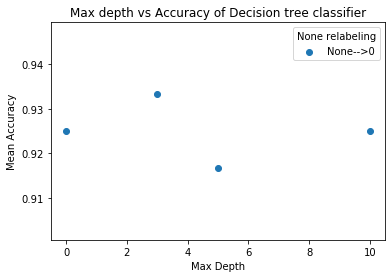

In [5]:
#plotting the graph of max depth vs accuracy.
plotclf.pyplot.scatter([3, 5, 10,0],mean_accuracy)
plotclf.pyplot.xlabel('Max Depth')
plotclf.pyplot.ylabel('Mean Accuracy')
plotclf.pyplot.title('Max depth vs Accuracy of Decision tree classifier')
plotclf.pyplot.legend(loc='best', title='None relabeling',labels=['None-->0'])

<h2> None --> 0 in graph for max depth. </h2>


<h2>OBSERVATIONS AND ANALYSIS</h2>
<h3>1.DEPTH= 3 is giving us the highest accuracy which is 93.33% because it is taking two features (Petal length and petal width) to generalize the data which are separating all the three classes giving highest accuracy which can be seen using graphviz in visual studio. </h3> 
<h3>2.There is no over-fitting and no under-fitting at this level of depth because these two features are enough for DT to learn the patterns and generalize well on test data.</h3>
<h3>3.When the depth is too low (say 1,2), classifier misses to learn the patterns because of less exposure to different decision functions covering different features, so in the end it also misclassifies the data points for both the training and the testing data as a result of under-fitting.</h3>
<h3>4. when the depth is too high, then our model will pay more attention to the training data resulting in over-fitting.</h3>
